In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Load and preprocessing data

#### Loading data

In [2]:
filename_test = "./data/fashion-mnist_test.csv"
filename_train = "./data/fashion-mnist_train.csv"
filename_classes = "./data/classes.csv"

df_train = pd.read_csv(filename_train, delimiter=',')
df_test = pd.read_csv(filename_test, delimiter=',')
df_classes = pd.read_csv(filename_classes, delimiter=',')

#### Spliting into traing and test set

In [3]:
X_train = df_train.loc[:, df_train.columns != "label"]
Y_train = df_train.loc[:, df_train.columns == "label"]

X_test = df_test.loc[:, df_train.columns != "label"]
Y_test = df_test.loc[:, df_train.columns == "label"]

classes = df_classes["class"]

print('Training set: X={}, y={}'.format(X_train.shape, Y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, Y_test.shape))

Training set: X=(60000, 784), y=(60000, 1)
Test set: X=(10000, 784), y=(10000, 1)


#### Train set  head

In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train.head()

,label
0,2
1,9
2,6
3,0
4,3


#### Train group values count

In [6]:
values_counts = Y_train.label.value_counts()

pd.DataFrame({ "label": [classes[idx] for idx in values_counts.index], "value": values_counts.values })

,label,value
0,Ankle boot,6000
1,Bag,6000
2,Sneaker,6000
3,Shirt,6000
4,Sandal,6000
5,Coat,6000
6,Dress,6000
7,Pullover,6000
8,Trouser,6000
9,T-shirt/top,6000


#### Test group values count

In [7]:
values_counts = Y_test.label.value_counts()

pd.DataFrame({ "label": [classes[idx] for idx in values_counts.index], "value": values_counts.values })

,label,value
0,Sneaker,1000
1,Shirt,1000
2,Sandal,1000
3,Coat,1000
4,Dress,1000
5,Pullover,1000
6,Ankle boot,1000
7,Trouser,1000
8,Bag,1000
9,T-shirt/top,1000


#### Classes to labels table

In [8]:
df_classes

,label,class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


#### Converting data to numpy

In [9]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

#### Showing dataset images

In [10]:
def show_samples(X, nrows=5, ncols=5, rsize=5, csize=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex='col', sharey='row', 
                           gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(rsize, csize))

    counter=0
    for row in ax:
        for col in row:
            col.imshow(X[counter], 'gray')
            counter += 1
    plt.show()

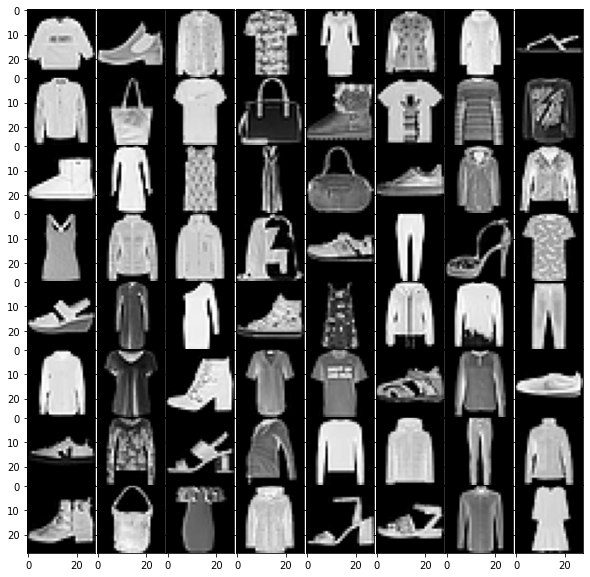

In [11]:
X_show = X_train.reshape(-1,28,28)
show_samples(X_show, nrows=8, ncols=8, rsize=10, csize=10)

#### Using Pipeline and ColumnTransformer for onehot encoding

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = ["label"]

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(categories ='auto'))
])

full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat)
])

Y_train_encoded = full_pipeline.fit_transform(Y_train).toarray()

print(f"X train set shape: {X_train.shape}")
print(f"Y train set shape: {Y_train_encoded.shape}")

X train set shape: (60000, 784)
Y train set shape: (60000, 10)


# MLPClassifier

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(X_train, np.ravel(Y_train))

In [46]:
print(classification_report(Y_test, clf.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.77      0.80      1000
     Trouser       0.96      0.97      0.96      1000
    Pullover       0.83      0.64      0.72      1000
       Dress       0.87      0.85      0.86      1000
        Coat       0.64      0.90      0.74      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.66      0.61      0.63      1000
     Sneaker       0.93      0.94      0.93      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [48]:
print(f"Accuracy:  {accuracy_score(Y_test, clf.predict(X_test))}")
print(f"Precision: {precision_score(Y_test, clf.predict(X_test), average='weighted')}")
print(f"Recall:    {recall_score(Y_test, clf.predict(X_test), average='weighted')}")

Accuracy:  0.8512
Precision: 0.8582846254351189
Recall:    0.8512


# Hyperparameters tunning for Custom Neural Network

#### Custom scorer

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

def custom_scorer(estimator, X, Y):
    # transform from one hot encoding to label encoding 
    y_true = np.argmax(Y, axis=1)
    y_pred = estimator.predict(X)
    return accuracy_score(y_true, y_pred)

In [14]:
accuracy_scorer = make_scorer(custom_scorer)

#### Using GridSearchCV for fitting the best parameters

In [15]:
from NeuralNetwork import NeuralNet
from sklearn.model_selection import GridSearchCV

model_params = dict(
                hidden_layer_sizes=[(50, ), (100, )],
                normalize=[True],
                learning_rate=[1, 0.1], 
                max_iter=[50, 100],
                batch_size=[1024, 4096, 16384, -1],
                momentum=[0, 0.5, 0.9]
)
    
model = NeuralNet()

# note
# cv - cross validation, multply the number of executions by checking variations of train/test data spliting
# n_jobs - cpu processors, n_jobs=-1 - all accessible
# scoring - custom scorer, could be build into the estimator    
grid = GridSearchCV(estimator=model, param_grid=model_params, scoring=custom_scorer, cv=2, n_jobs=-1)

In [16]:
%%time
grid.fit(X_train, Y_train_encoded)

Wall time: 31min 53s


GridSearchCV(cv=2, error_score=nan,
             estimator=<NeuralNetwork.NeuralNet object at 0x000001970D8DC6C8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [1024, 4096, 16384, -1],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate': [1, 0.1], 'max_iter': [50, 100],
                         'momentum': [0, 0.5, 0.9], 'normalize': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=<function custom_scorer at 0x000001970D0B23A8>, verbose=0)

#### Output best parameters

In [17]:
res = [print(f"{key}: {val}") for key, val in grid.best_params_.items()]

batch_size: 1024
hidden_layer_sizes: (100,)
learning_rate: 1
max_iter: 50
momentum: 0.5
normalize: True


# Fitting a Custom Neural Network with best hyperparameters

In [18]:
from NeuralNetwork import NeuralNet
cls = NeuralNet()
cls.set_params(**grid.best_params_)

0-th iteration: 0.050410463739520454
10-th iteration: 0.03932277532377742
20-th iteration: 0.02449160803703758
30-th iteration: 0.022885404651396258
40-th iteration: 0.01886894200292609


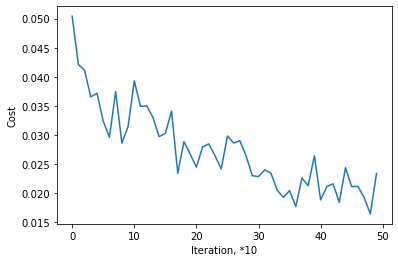

Wall time: 48.6 s


In [19]:
%%time
cls.fit(X_train, Y_train_encoded, print_cost=True, print_by=10)

# Result analyzing

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Train set

### Accuracy

In [21]:
print(f"Accuracy:  {accuracy_score(Y_train, cls.predict(X_train))}")
print(f"Precision: {precision_score(Y_train, cls.predict(X_train), average='weighted')}")
print(f"Recall:    {recall_score(Y_train, cls.predict(X_train), average='weighted')}")

Accuracy:  0.92135
Precision: 0.9290969456558809
Recall:    0.92135


### Classification report 

In [22]:
print(classification_report(Y_train, cls.predict(X_train), target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.92      0.86      0.89      6000
     Trouser       1.00      0.98      0.99      6000
    Pullover       0.90      0.85      0.87      6000
       Dress       0.92      0.95      0.93      6000
        Coat       0.93      0.73      0.82      6000
      Sandal       0.99      0.99      0.99      6000
       Shirt       0.69      0.91      0.78      6000
     Sneaker       0.98      0.98      0.98      6000
         Bag       0.99      0.98      0.99      6000
  Ankle boot       0.98      0.98      0.98      6000

    accuracy                           0.92     60000
   macro avg       0.93      0.92      0.92     60000
weighted avg       0.93      0.92      0.92     60000



### Confution matrix

In [23]:
cls.predict(X_test)
cm_train = pd.DataFrame(data = confusion_matrix(Y_test, cls.predict(X_test)), 
                  index = classes, 
                  columns= classes)
cm_train

class,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
class,,,,,,,,,,
T-shirt/top,803,1,6,19,1,2,162,0,6,0
Trouser,3,977,1,12,0,1,6,0,0,0
Pullover,18,1,787,14,43,0,136,0,1,0
Dress,21,11,9,914,14,1,29,0,1,0
Coat,1,0,85,38,695,0,178,0,3,0
Sandal,0,0,0,0,0,947,1,30,3,19
Shirt,89,0,45,23,22,0,815,0,6,0
Sneaker,0,0,0,0,0,18,0,944,1,37
Bag,7,0,6,3,1,3,18,2,958,2


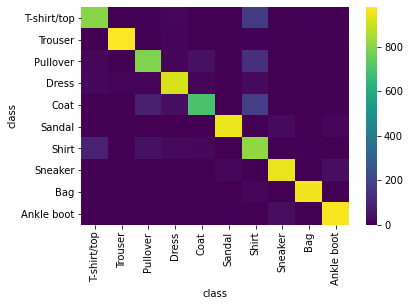

In [24]:
sns.heatmap(cm_train, cmap="viridis")

## Test set

In [25]:
print(f"Accuracy:  {accuracy_score(Y_test, cls.predict(X_test))}")
print(f"Precision: {precision_score(Y_test, cls.predict(X_test), average='weighted')}")
print(f"Recall:    {recall_score(Y_test, cls.predict(X_test), average='weighted')}")

Accuracy:  0.8804
Precision: 0.8900977485938467
Recall:    0.8804


### Classification report

In [26]:
print(classification_report(Y_test, cls.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.80      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.79      0.81      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.90      0.69      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.61      0.81      0.70      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



### Confusion matrix

In [27]:
cls.predict(X_test)
cm_test = pd.DataFrame(data = confusion_matrix(Y_test, cls.predict(X_test)), 
                  index = classes, 
                  columns= classes)
cm_test

class,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
class,,,,,,,,,,
T-shirt/top,803,1,6,19,1,2,162,0,6,0
Trouser,3,977,1,12,0,1,6,0,0,0
Pullover,18,1,787,14,43,0,136,0,1,0
Dress,21,11,9,914,14,1,29,0,1,0
Coat,1,0,85,38,695,0,178,0,3,0
Sandal,0,0,0,0,0,947,1,30,3,19
Shirt,89,0,45,23,22,0,815,0,6,0
Sneaker,0,0,0,0,0,18,0,944,1,37
Bag,7,0,6,3,1,3,18,2,958,2


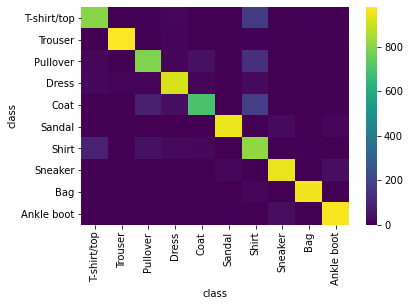

In [28]:
sns.heatmap(cm_test, cmap="viridis")

In [29]:
def show_samples_with_labels(X, Y, classes, nrows=5, ncols=5, rsize=5, csize=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex='col', sharey='row', 
                           gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(rsize, csize))

    counter=0
    for row in ax:
        for col in row:
            col.imshow(X[counter], 'gray')
            col.text(25, 25, classes[Y[counter]], bbox={'facecolor': 'white', 'pad': 10}, horizontalalignment='right', fontsize=14)
            counter += 1
            
    plt.show()

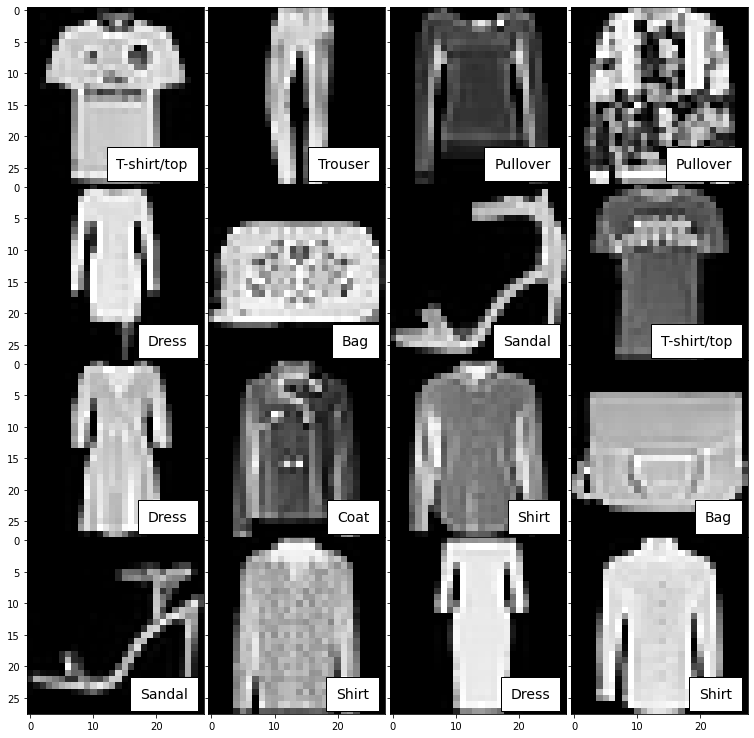

In [30]:
Y_pred = cls.predict(X_test)
correct_idx = np.where(Y_pred == Y_test.iloc[:, 0])[0]

X_show = X_test.reshape(-1,28,28)
show_samples_with_labels(X_show[correct_idx], Y_pred[correct_idx], classes, nrows=4, ncols=4, rsize=13, csize=13)